Within-talkpage-network is modeled as a directed graph.

In [37]:
# define functions to work with graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



def createGraph(pathtographfile):
    f = open(pathtographfile, 'r')
    edge_to_weight = {}
    for line in f:
        key = line.rstrip()
        if key in edge_to_weight:
            edge_to_weight[key] += 1
        else:
            edge_to_weight[key] = 1
    G = nx.DiGraph()
    for (e,w) in edge_to_weight.items():
        v = e.split(",")
        G.add_edge(v[0], v[1], weight=w)
    return G

def computeAndPlotDegreeStats(G):
    in_degrees = []
    count = 0
    for indeg in G.in_degree_iter():
        in_degrees.append(indeg[1])
        if (indeg[1] >= 1):
            count += 1
        

    print("mean in-degree", np.mean(in_degrees), "sd = ", np.std(in_degrees))
    print ("max in-degree = ", np.max(in_degrees))
    print("w. in-degree >= 1 = ", count)

    out_degrees = []
    count = 0
    for outdeg in G.out_degree_iter():
        out_degrees.append(outdeg[1])
        if (outdeg[1] >= 1):
            count += 1
    print("mean out-degree", np.mean(out_degrees), " sd =", np.std(out_degrees))
    print ("max out-degree = ", np.max(out_degrees))
    print("w. out-degree >= 1 = ", count)
   
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(12,6))
    idplot = fig.add_subplot(121)
    idplot.hist(in_degrees, bins=50)
    idplot.set_title("in-degree distribution")
    odplot = fig.add_subplot(122)
    odplot.hist(out_degrees, bins=50)
    odplot.set_title("out-degree distribution")
    plt.show()
    
    
def boxPlotDegreeDist(G):
    in_degrees = []
    for indeg in G.in_degree_iter():
        in_degrees.append(indeg[1])
    print("Avg. indegree ", np.mean(in_degrees))
    print("Std. indegree ", np.std(in_degrees))
    out_degrees = []
    for outdeg in G.out_degree_iter():
        out_degrees.append(outdeg[1])
    print("Avg. outdegree", np.mean(out_degrees))
    print("Std. outdegree", np.std(out_degrees))
    data = [in_degrees, out_degrees]
    plt.figure()
    plt.boxplot(data, labels=["in-degree", "out-degree"])
    plt.savefig("/Users/totucuong-standard/Projects/wikisocial-paper/images/boxplot_degree")
    plt.show()
    
#     fig2 = plt.figure(figsize=(12,6))
#     indegbox = fig2.add_subplot(121)
#     indegbox.set_title("in-degree")
#     indegbox.boxplot(in_degrees)
#     outdegbox = fig2.add_subplot(122)
#     outdegbox.set_title("out-degree")
#     outdegbox.boxplot(out_degrees)
#     plt.show()


def drawGraph(G, name):
    nx.draw(G, node_size=10)
    plt.savefig(name)
    plt.show()
    
def analyzeComponents(G):
    UG = G.to_undirected()
    largest_cc = max(nx.connected_components(UG), key=len)
    print("number of components:", nx.number_connected_components(UG))
    print("number of nodes in large connected component", len(largest_cc))
    print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
    print("size of giant component", len(largest_cc))
    

# compute top-k indegree of a network
# direction={'in', 'out'}
# k = number of nodes
# G = a graph
def top_degree(direction,k,G):
    degree_dict = None
    if (direction == 'in'):
        print('in degree computation...')
        degree_dict = wtpNetwork.in_degree()
    elif (direction == 'out'):
        print('out degree computation....')
        degree_dict = wtpNetwork.out_degree()
    else:
        raise ValueError("direction must be in or out")
    degree_tuples = [(k,v) for k, v in degree_dict.items()]
    degree_tuples_sorted = sorted(degree_tuples, key = lambda x: x[1], reverse=True)
    result = []
    for i in range(10):
        result.append(degree_tuples_sorted[i])
    return result

def degree_assortativity_analysis(G, name):
    # r(in, out)
    result = {}
    print("Degree assortativity of graph ", name)
    r_in_out = nx.degree_assortativity_coefficient(G, x='in', y='out')
    print('r(in,out) = ', r_in_out)
    result['in_out'] = r_in_out

    # r(in, in)
    r_in_in = nx.degree_assortativity_coefficient(G, x='in', y='in')
    print('r(in,in) = ', r_in_in)
    result['in_in'] = r_in_in

    # r(out, in)
    r_out_in = nx.degree_assortativity_coefficient(G, x='out', y='in')
    print('r(out,in) = ', r_out_in)
    result['out_in'] = r_out_in

    # r(out, out)
    r_out_out = nx.degree_assortativity_coefficient(G, x='out', y='out')
    print('r(out,out) = ', r_out_out)
    result['out_out'] = r_out_out
    return result
    
    
def generate_random_graph(G):
    in_degs = [node[1] for node in G.in_degree_iter()]
    out_degs = [node[1] for node in G.out_degree_iter()]
    random_graphs = []
    for i in range(100):
        random_graphs.append(nx.directed_configuration_model(in_degs,out_degs))
    return random_graphs


def compute_assortativity_mean_std(graphs, x='in', y='out'):
    result = {}
    assortativities = []
    for i in range(100):
        assortativities.append(nx.degree_assortativity_coefficient(graphs[i], x, y))
    result['mean'] = np.mean(assortativities)
    result['std'] = np.std(assortativities)
    return result

def zscore(r, mean, std):
    return (r-mean)/std
    

def compute_z_score_for_assortativity(G, name):
    """
    G: graph that we want to study assortitativity
    name: name of graph that we want to study
    """
    # compute degree assortativity
    assort = degree_assortativity_analysis(G,name)
    
    # compute z-score to see the confidence |Z| > 2 is consisdered to be believable
    random_graphs = generate_random_graph(G)
    
    # z(in,out)
    stats = compute_assortativity_mean_std(random_graphs, x='in', y='out')
    print('z(in,out) = ', zscore(assort['in_out'], stats['mean'], stats['std']))
    print('std_in_out = ', stats['std'])
    print('mean_in_out = ', stats['mean'])

    # z(in, in)
    stats = compute_assortativity_mean_std(random_graphs, x='in', y='in')
    print('z(in,in) = ', zscore(assort['in_in'], stats['mean'], stats['std']))
    print('std_in_in = ', stats['std'])
    print('mean_in_in = ', stats['mean'])

    # z(out, in)
    stats = compute_assortativity_mean_std(random_graphs, x='out', y='in')
    print('z(out,in) = ', zscore(assort['out_in'], stats['mean'], stats['std']))
    print('std_out_in = ', stats['std'])
    print('mean_out_in = ', stats['mean'])


    # z(out, out)
    stats = compute_assortativity_mean_std(random_graphs, x='out', y='out')
    print('z(out, out) = ', zscore(assort['out_out'], stats['mean'], stats['std']))
    print('std_out_out = ', stats['std'])
    print('mean_out_out = ', stats['mean'])

                  

## Within-Network-Page Network Analysis


In [2]:
wtpNetwork = createGraph("../data/wtpnetwork.csv")
print("number of nodes: ",str(wtpNetwork.number_of_nodes()))
print("number of edges: ",str(wtpNetwork.number_of_edges()))

number of nodes:  1666
number of edges:  4363


mean in-degree 2.61884753902 sd =  5.16190265386
max in-degree =  73
w. in-degree >= 1 =  1457
mean out-degree 2.61884753902  sd = 6.16085735736
max out-degree =  117
w. out-degree >= 1 =  1266


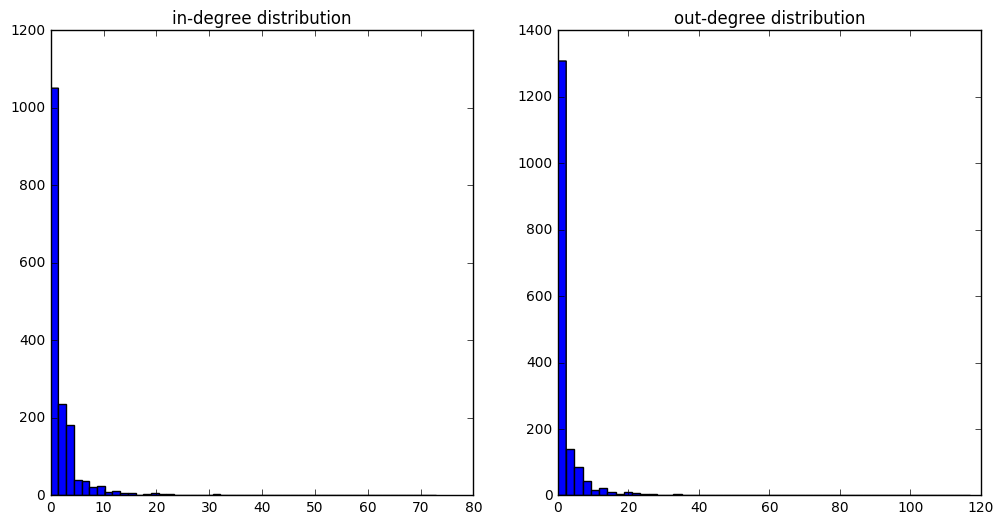

In [3]:
computeAndPlotDegreeStats(wtpNetwork)

Avg. indegree  2.61884753902
Std. indegree  5.16190265386
Avg. outdegree 2.61884753902
Std. outdegree 6.16085735736


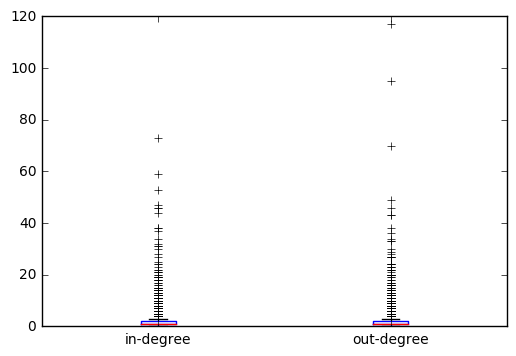

In [4]:
boxPlotDegreeDist(wtpNetwork)

Here we look closer at the outlier of in-degree and out-degree people.

In [5]:
# in degree dictionary: node -> in-degree
node_to_indegree = dict(list(wtpNetwork.in_degree_iter()))
max_in_degree = np.max(list(node_to_indegree.values()))

# inverted index: in-degree -> node
indegree_to_node = [set() for x in range(0, max_in_degree+1)]
for k, v in node_to_indegree.items():
    indegree_to_node[v].add(k)
    
print("The person got asked alot ", indegree_to_node[max_in_degree])
print ("max in degree", max_in_degree)
# out degree dictionary: node -> out-degree
node_to_outdegree = dict(list(wtpNetwork.out_degree_iter()))
max_out_degree = np.max(list(node_to_outdegree.values()))
# inverted index: out-degree -> node
outdegree_to_node = [set() for x in range(0, max_out_degree+1)]
for k, v in node_to_outdegree.items():
    outdegree_to_node[v].add(k)
    
print("The person asked alot ", outdegree_to_node[max_out_degree])
# print ("max out degree", max_out_degree)

The person got asked alot  {'Ymblanter'}
max in degree 73
The person asked alot  {'Ymblanter'}


## Top influnencers

In [6]:
# ranking by in-degree
top_10_indeg = top_degree(direction='in', G=wtpNetwork, k=10)
print("top 10 in-degree")
print(top_10_indeg)

# ranking by out-degree
top_10_outdeg = top_degree(direction='out', G=wtpNetwork, k=10)
print("top 10 out-degree")
print(top_10_outdeg)



in degree computation...
top 10 in-degree
[('Ymblanter', 73), ('Ricordi', 59), ('Zolo', 53), ('Kolja21', 47), ('Vogone', 46), ('Stryn', 46), ('Tobias1984', 44), ('Multichill', 38), ('Succu', 38), ('Infovarius', 37)]
out degree computation....
top 10 out-degree
[('Ymblanter', 117), ('Ricordi', 95), ('Kolja21', 70), ('Vogone', 49), ('Jared_Preston', 46), ('Yamaha5', 43), ('Jasper_Deng', 43), ('Multichill', 38), ('Hsarrazin', 36), ('לערי_ריינהארט', 34)]


## Graph Visualization

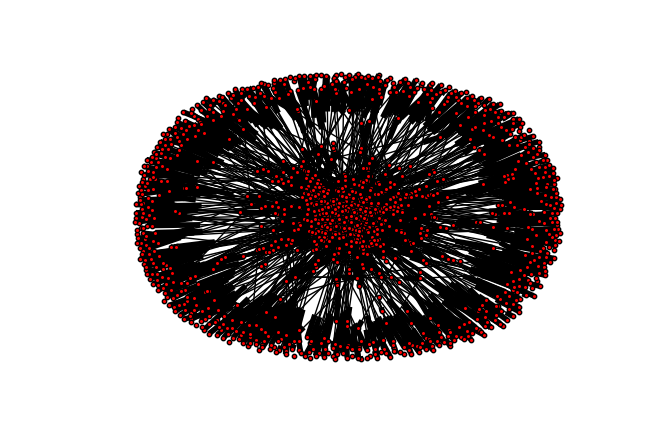

In [7]:
# """
# Draw a graph with matplotlib.
# You must have matplotlib for this to work.
# """
# try:
#     import matplotlib.pyplot as plt
# except:
#     raise

# import networkx as nx

# # G=nx.path_graph(8)

# nx.draw(GG, node_size=10)
# plt.savefig("wtp-network.png") # save as png
# plt.show() # display
print("WTP-Network")
drawGraph(wtpNetwork, "wtp-network.png")

## Connected components
The statistics in this section is computed by treating G as undirected graph (UG)

In [8]:
UG = G.to_undirected()
# nC = nx.number_connected_components(UG)
# C = nx.connected_components(UG)
largest_cc = max(nx.connected_components(UG), key=len)
print("number of nodes in large connected component", len(largest_cc))
print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
print("size of giant component", len(largest_cc))

NameError: name 'G' is not defined

## Distance measures


In [28]:
# giant component
GG = G.subgraph(largest_cc)
print("GG is ",nx.is_directed(GG))
print("average distance in giant component: ", nx.average_shortest_path_length(GG))
print(len(GG))

GG is  True
average distance:  2.2444232773698127
1428


In [20]:
print("number of nodes ", len(paths.keys()))
print(len(paths['Acroterion']))
# for target in paths['Acroterion']:
#     print("path length from Acroterion", len(paths['Acroterion'][target]))

number of nodes  1428
1189


## Inter-Talk Page Network Analysis

In [9]:
itpNetwork = createGraph("../data/itpnetwork.csv")
print("number of nodes: ",str(itpNetwork.number_of_nodes()))
print("number of edges: ",str(itpNetwork.number_of_edges()))

number of nodes:  2420
number of edges:  6914


mean in-degree 2.85702479339 sd =  8.94613196295
max in-degree =  172
w. in-degree >= 1 =  946
mean out-degree 2.85702479339  sd = 8.47062328974
max out-degree =  227
w. out-degree >= 1 =  1925


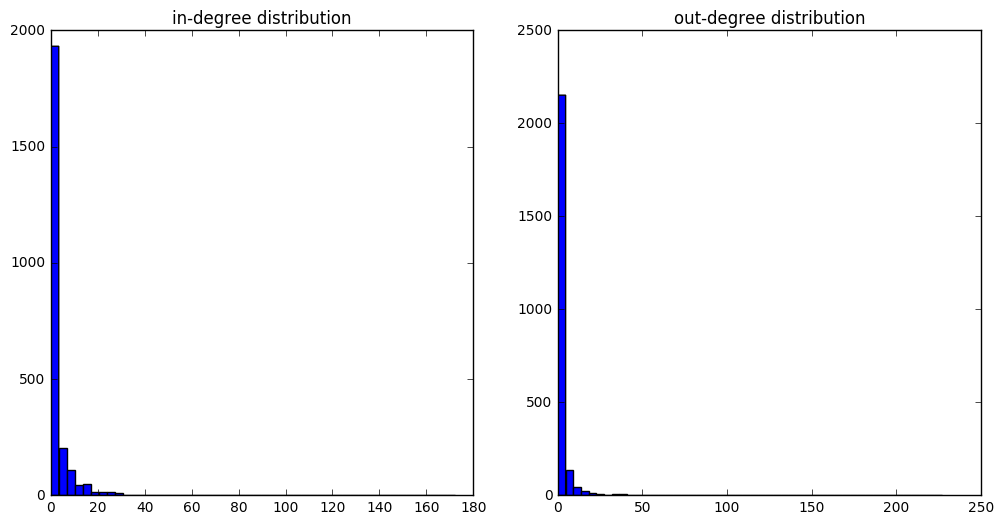

In [10]:
computeAndPlotDegreeStats(itpNetwork)

Avg. indegree  2.85702479339
Std. indegree  8.94613196295
Avg. outdegree 2.85702479339
Std. outdegree 8.47062328974


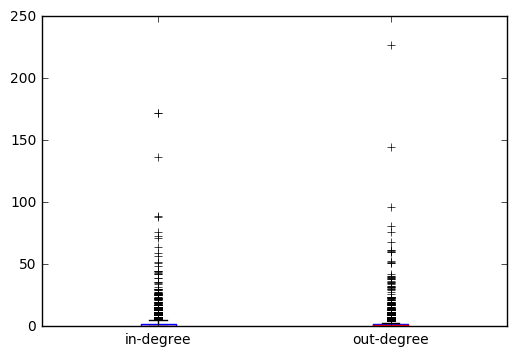

In [11]:
boxPlotDegreeDist(itpNetwork)

In [12]:
analyzeComponents(itpNetwork)

number of components: 55
number of nodes in large connected component 2343
size of giant component compared to original graph 96.81818181818181
size of giant component 2343


ITP-Network


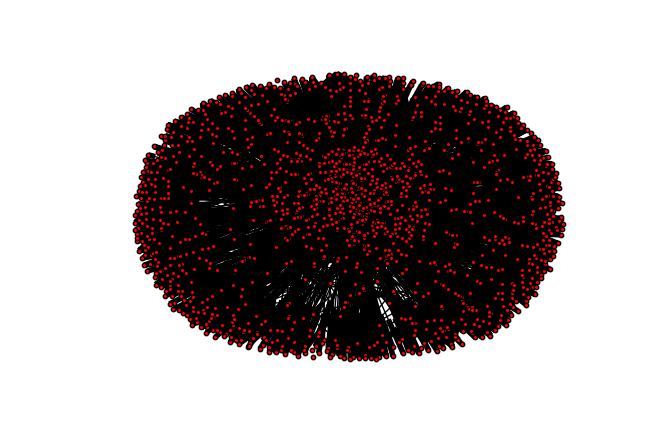

In [13]:
print("ITP-Network")
drawGraph(itpNetwork, "itp-network.png")

## Degree Assortitative Analysis

In [172]:
degree_assortativity_analysis(itpNetwork, "inter page talk network")
degree_assortativity_analysis(wtpNetwork, "within talk page network")



Degree assortativity of graph  inter page talk network
r(in,out) =  -0.0393516801855
r(in,in) =  -0.0144629169003
r(out,in) =  -0.186306983104
r(out,out) =  -0.13743059927
Degree assortativity of graph  within talk page network
r(in,out) =  -0.0591878183177
r(in,in) =  -0.0664438739317
r(out,in) =  -0.0691893942418
r(out,out) =  -0.0696519479325


{'in_in': -0.066443873931697137,
 'in_out': -0.059187818317740178,
 'out_in': -0.069189394241765137,
 'out_out': -0.069651947932465028}

We now need to verify significant testing with Z-score by generate 100 graphs for each talk page networks with the same in-degree and out-degree sequences.

In [121]:
# generate 100 random graphs with the same in, out-degree sequence
wtp_in_degs = [node[1] for node in wtpNetwork.in_degree_iter()]
wtp_out_degs = [node[1] for node in wtpNetwork.out_degree_iter()]
wtp_random_graphs = []
for i in range(100):
    wtp_random_graphs.append(nx.directed_configuration_model(wtp_in_degs,wtp_out_degs))

# generate 100 random graphs with the same in, out-degree sequence
itp_in_degs = [node[1] for node in itpNetwork.in_degree_iter()]
itp_out_degs = [node[1] for node in itpNetwork.out_degree_iter()]
itp_random_graphs = []
for i in range(100):
    itp_random_graphs.append(nx.directed_configuration_model(itp_in_degs, itp_out_degs))
    



In [34]:

compute_z_score_for_assortativity(wtpNetwork, "within talk page network")
compute_z_score_for_assortativity(itpNetwork, "inter talk page network")


Degree assortativity of graph  within talk page network
r(in,out) =  -0.0591878183177
r(in,in) =  -0.0664438739317
r(out,in) =  -0.0691893942418
r(out,out) =  -0.0696519479325
z(in,out) =  -3.87355311315
std_in_out =  0.0156262911005
mean_in_out =  0.0013414502216
z(in,in) =  -4.30502906016
std_in_in =  0.0156001271804
mean_in_in =  0.000715126922283
z(out,in) =  -4.46193994776
std_out_in =  0.015789091462
mean_out_in =  0.0012605836916
z(out, out) =  -4.49545337543
std_out_out =  0.0158379954221
mean_out_out =  0.00154702204778
Degree assortativity of graph  inter talk page network
r(in,out) =  -0.0266931552194
r(in,in) =  -0.00895141305094
r(out,in) =  -0.0527307877376
r(out,out) =  0.00725938478923
z(in,out) =  -2.15231783646
std_in_out =  0.0132189334814
mean_in_out =  0.00175819109151
z(in,in) =  -0.728069769879
std_in_in =  0.0113616996681
mean_in_in =  -0.000679302988169
z(out,in) =  -4.60794869998
std_out_in =  0.0113856818374
mean_out_in =  -0.000266149916673
z(out, out) =  0.

Now we compute the statistical significance. According to "Edge direction and structure of networks", Jacob G. Foster et al. r(out,in) (degree assortativity of in degree of source node and out degree of target node) is computed as Pearson correlation between two random variables: X being out degree of source node and Y being in degree of target node. We have similar definitions for r(out,out), r(in,in), and r(in,out).

The Z-score is computed is as how many deviation of r-value from an average (over 100) in our case. 

## Content network analysis


In [28]:
# there is something odd about some lines in contentnetwork.csv (e.g. ",0,,1"). We need to remove them. 

inputfile = open("../data/contentnetwork.csv", 'r')
outputfile = open("../data/contentnetworkprocessed.csv", 'w+')
for l in inputfile:
    if (not l.startswith(",")):
#         print(l)
        outputfile.write(l.upper())


In [14]:
itpNetwork = createGraph("../data/contentnetwork.csv")
print("number of nodes: ",str(itpNetwork.number_of_nodes()))
print("number of edges: ",str(itpNetwork.number_of_edges()))

number of nodes:  3337
number of edges:  7390


In [29]:
pitpNetwork = createGraph("../data/contentnetworkprocessed.csv")
print("number of nodes: ",str(pitpNetwork.number_of_nodes()))
print("number of edges: ",str(pitpNetwork.number_of_edges()))

number of nodes:  3236
number of edges:  7219


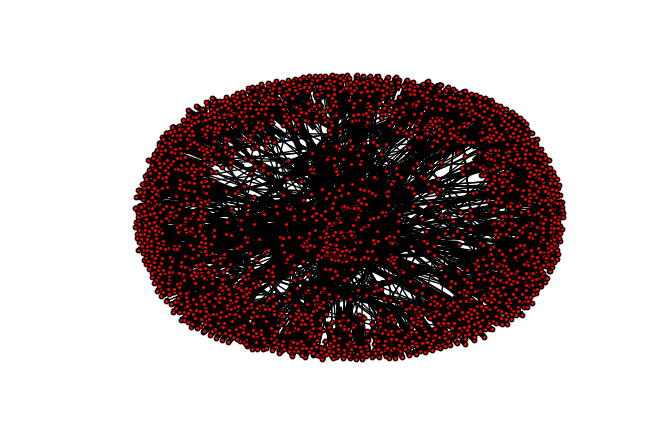

In [31]:
drawGraph(pitpNetwork, 'content network')

In [35]:
compute_z_score_for_assortativity(pitpNetwork, "content network")



Degree assortativity of graph  content network
r(in,out) =  -0.0160816501854
r(in,in) =  0.000567802765064
r(out,in) =  -0.0518957120706
r(out,out) =  0.0231542438134
z(in,out) =  -1.30444154834
std_in_out =  0.0124509175269
mean_in_out =  0.00015984395168
z(in,in) =  0.0826487229962
std_in_in =  0.0110309494797
mean_in_in =  -0.000343891122865
z(out,in) =  -4.09601360266
std_out_in =  0.0125095501251
mean_out_in =  -0.000656424594828
z(out, out) =  1.95269569859
std_out_out =  0.0115159608605
mean_out_out =  0.000667076575937


Avg. indegree  2.23084054388
Std. indegree  8.00116960922
Avg. outdegree 2.23084054388
Std. outdegree 4.40412781548


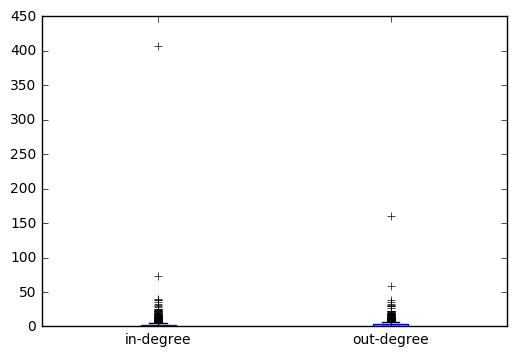

In [36]:
boxPlotDegreeDist(pitpNetwork)

## Within talk page in property namespace

In [44]:
wtppropNetwork = createGraph("../data/wtpnetwork_propertynamespace.csv")
print("number of nodes: ",str(wtppropNetwork.number_of_nodes()))
print("number of edges: ",str(wtppropNetwork.number_of_edges()))

number of nodes:  521
number of edges:  1572


Avg. indegree  3.01727447217
Std. indegree  5.46860600963
Avg. outdegree 3.01727447217
Std. outdegree 6.61801828979


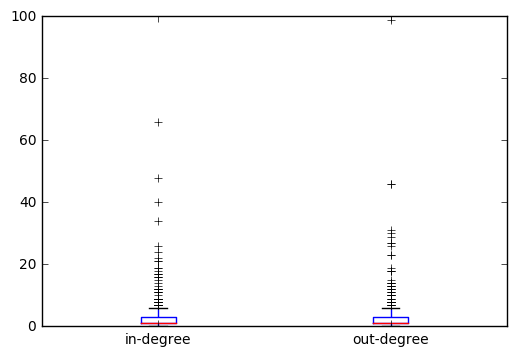

In [45]:
boxPlotDegreeDist(wtppropNetwork)

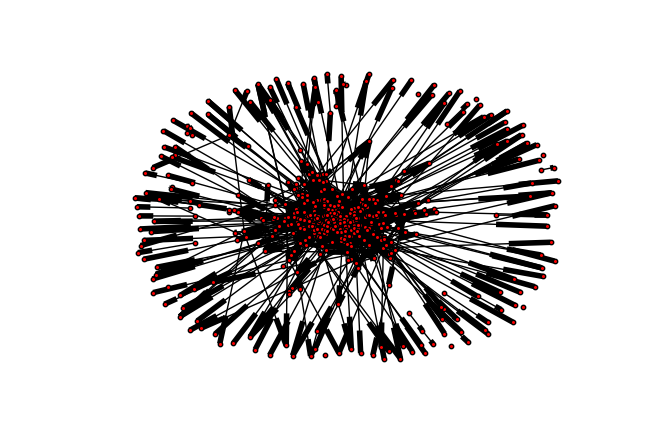

In [46]:
drawGraph(wtppropNetwork, 'wtp network - property talk space')

In [47]:
compute_z_score_for_assortativity(wtppropNetwork, "wtp network property namespace")



Degree assortativity of graph  wtp network property namespace
r(in,out) =  -0.118782445007
r(in,in) =  -0.12335057514
r(out,in) =  -0.130549598205
r(out,out) =  -0.122429496378
z(in,out) =  -4.50610630242
std_in_out =  0.026514821377
mean_in_out =  0.000696158707091
z(in,in) =  -4.81484244337
std_in_in =  0.0258493764175
mean_in_in =  0.00111009956957
z(out,in) =  -5.02528670826
std_out_in =  0.0263372957298
mean_out_in =  0.00180286395731
z(out, out) =  -4.58052949097
std_out_out =  0.0270796503011
mean_out_out =  0.00160964043111
